<a href="https://colab.research.google.com/github/SudharsanSrinivasan14/POC/blob/main/Shopping_Center_MLR%2CKNN%2CSVM_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier

# **Data On Boarding**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Shopping_center.csv to Shopping_center.csv


In [ ]:
df = read_csv('Shopping_center.csv')

In [ ]:
df

,Customer ID,Gender,Age,Annual Income in K$,Spending Points (1-100)
0,15101,Male,19,15,39
1,15102,Male,21,15,81
2,15103,Female,20,16,6
3,15104,Female,23,16,77
4,15105,Female,31,17,40
...,...,...,...,...,...
195,15296,Female,35,120,79
196,15297,Female,45,126,28
197,15298,Male,32,126,74
198,15299,Male,32,137,18


In [ ]:
dt=df.copy()

# **EDA**

In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Annual Income in K$',
       'Spending Points (1-100)'],
      dtype='object')

In [ ]:
df.head()

,Customer ID,Gender,Age,Annual Income in K$,Spending Points (1-100)
0,15101,Male,19,15,39
1,15102,Male,21,15,81
2,15103,Female,20,16,6
3,15104,Female,23,16,77
4,15105,Female,31,17,40


In [ ]:
df.describe()

,Customer ID,Age,Annual Income in K$,Spending Points (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,15200.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,15101.000000,18.000000,15.000000,1.000000
25%,15150.750000,28.750000,41.500000,34.750000
50%,15200.500000,36.000000,61.500000,50.000000
75%,15250.250000,49.000000,78.000000,73.000000
max,15300.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Customer ID              200 non-null    int64 
 1   Gender                   200 non-null    object
 2   Age                      200 non-null    int64 
 3   Annual Income in K$      200 non-null    int64 
 4   Spending Points (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull()

,Customer ID,Gender,Age,Annual Income in K$,Spending Points (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [ ]:
df.isnull().sum()

Customer ID                0
Gender                     0
Age                        0
Annual Income in K$        0
Spending Points (1-100)    0
dtype: int64

***This dataset have no NaN Values. So, calc. missing value percentage is no need.***

# **Label Encoding**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()
df

,Customer ID,Gender,Age,Annual Income in K$,Spending Points (1-100)
0,15101,1,19,15,39
1,15102,1,21,15,81
2,15103,0,20,16,6
3,15104,0,23,16,77
4,15105,0,31,17,40
...,...,...,...,...,...
195,15296,0,35,120,79
196,15297,0,45,126,28
197,15298,1,32,126,74
198,15299,1,32,137,18


# **Drop Entire Column ('Customer ID') Values**

In [ ]:
dt1 = df.drop(['Customer ID'],axis = 1)
dt1

,Gender,Age,Annual Income in K$,Spending Points (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# **X,Y ILOC**

In [ ]:
x=dt1.iloc[:,0:3]
x

,Gender,Age,Annual Income in K$
0,1,19,15
1,1,21,15
2,0,20,16
3,0,23,16
4,0,31,17
...,...,...,...
195,0,35,120
196,0,45,126
197,1,32,126
198,1,32,137


In [ ]:
y=dt1.iloc[:,3]
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Points (1-100), Length: 200, dtype: int64

# **Data Normalization**

In [ ]:
data = df.values
data

from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

data_norm = Normalizer(norm ='l1').fit(data)

data_normalized= data_norm.transform(data)

print(data_normalized[0:7])

[[9.95123558e-01 6.58978583e-05 1.25205931e-03 9.88467875e-04
  2.57001647e-03]
 [9.92247043e-01 6.57030223e-05 1.37976347e-03 9.85545335e-04
  5.32194481e-03]
 [9.97226808e-01 0.00000000e+00 1.32056784e-03 1.05645428e-03
  3.96170353e-04]
 [9.92378449e-01 0.00000000e+00 1.51116951e-03 1.05124836e-03
  5.05913272e-03]
 [9.94207859e-01 0.00000000e+00 2.04041335e-03 1.11893635e-03
  2.63279142e-03]
 [9.92444649e-01 0.00000000e+00 1.44537153e-03 1.11687800e-03
  4.99310164e-03]
 [9.96109719e-01 0.00000000e+00 2.30779375e-03 1.18686536e-03
  3.95621786e-04]]


# **train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state=0)

In [ ]:
y_test

18     29
170    13
107    46
98     42
177    69
182    15
5      76
146    36
12     15
152    20
61     55
125    77
180    32
154    16
80     51
7      94
33     92
130     9
37     73
74     47
183    88
145    97
45     65
159    73
60     56
123    91
179    90
185    97
122    58
44     28
16     35
55     41
150    17
111    54
22      5
189    85
129    75
4      40
83     44
106    50
134     5
66     50
26     32
113    46
168    27
63     59
8       3
75     54
118    43
143    87
71     42
124    29
184    39
97     50
149    90
24     14
30      4
160    35
40     35
56     50
Name: Spending Points (1-100), dtype: int64

# **Multi Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
std_reg = LinearRegression()
std_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# predict the results
y_predict = std_reg.predict(x_test)
y_predict

array([44.6306485 , 46.68864947, 41.5794567 , 44.42579631, 52.57064582,
       43.3612495 , 62.47872687, 43.57057789, 45.88174956, 49.1736032 ,
       58.46817723, 55.53665992, 51.35404153, 47.80388455, 40.6907984 ,
       61.96870283, 59.61961508, 44.34785768, 57.91747423, 39.77765263,
       54.95317346, 52.70203559, 60.38965578, 55.56562359, 35.1829601 ,
       48.10734307, 48.65080699, 50.61296451, 51.4809551 , 48.97533366,
       56.32947476, 45.84448991, 45.79999117, 61.38969259, 51.09336842,
       51.48990751, 48.45701365, 58.36957091, 49.54328505, 39.930767  ,
       56.56842328, 51.23371061, 51.38958786, 57.50605652, 52.34512593,
       46.26486003, 39.36557848, 54.84455783, 46.56555567, 54.75938013,
       49.35396792, 59.18924299, 49.42084769, 57.89746296, 49.90914713,
       47.28043189, 40.60390736, 43.64127743, 41.72361865, 47.79493214])

In [ ]:
y_test

18     29
170    13
107    46
98     42
177    69
182    15
5      76
146    36
12     15
152    20
61     55
125    77
180    32
154    16
80     51
7      94
33     92
130     9
37     73
74     47
183    88
145    97
45     65
159    73
60     56
123    91
179    90
185    97
122    58
44     28
16     35
55     41
150    17
111    54
22      5
189    85
129    75
4      40
83     44
106    50
134     5
66     50
26     32
113    46
168    27
63     59
8       3
75     54
118    43
143    87
71     42
124    29
184    39
97     50
149    90
24     14
30      4
160    35
40     35
56     50
Name: Spending Points (1-100), dtype: int64

## **Plotting**

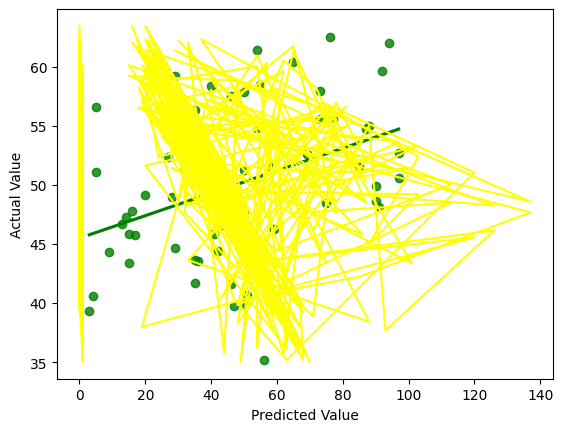

In [ ]:
sns.regplot(x=y_test,y=y_predict,ci=None,color="green")
plt.plot(x_train,std_reg.predict(x_train),color="Yellow")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

# **KNN Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()

knn_model.fit(x_train, y_train)

#Predicting the test set result
y2_pred= knn_model.predict(x_test)
y2_pred

array([15.8, 58.4, 55.6, 49.2, 82.4, 19.4, 64. , 32.2, 15.2, 41.4, 55.6,
       76.2, 52.6, 46.4, 50.2, 64. , 81.6, 50.6, 54.8, 51. , 66.4, 60.4,
       67.4, 72.8, 50.4, 57.4, 67.4, 66.4, 57.4, 40.4, 50.2, 46.8, 41.4,
       46. , 15.8, 52.6, 63.4, 57.6, 47. , 49. , 22.2, 50.8, 25.4, 46. ,
       67. , 51.2, 29.4, 54.2, 53.8, 53.6, 46.4, 47.6, 41. , 49. , 38.2,
       25.2, 29.4, 14. , 51.4, 46.8])

# **SVM Regression**

In [ ]:
# Import and build Support Vector Regression
from sklearn.svm import SVR
SVR_model = SVR(kernel='rbf')
SVR_model.fit(x_train, y_train)

# Predict the outcome using Test data
y3_predict = SVR_model.predict(x_test)

y3_predict

array([52.7605773 , 50.69480354, 49.03689189, 49.86299684, 52.35369726,
       50.38046698, 57.03710192, 49.48646956, 52.25300525, 50.0068537 ,
       55.07792049, 51.90731589, 51.41060378, 49.61848829, 49.23448734,
       56.91721192, 56.38581502, 49.64478452, 54.96062741, 49.04224499,
       52.37010925, 52.1716912 , 55.22915177, 51.90933723, 48.92608561,
       50.79810425, 51.51527777, 52.28983558, 50.65431727, 51.59098327,
       55.37180511, 51.46914394, 50.13991666, 53.69383073, 53.44121149,
       51.75562721, 50.89103835, 56.11858985, 50.60364549, 48.10061208,
       53.16422077, 51.57177642, 53.31195737, 53.63657478, 51.21903725,
       50.13638368, 51.70279465, 53.53297648, 49.23638348, 51.65620699,
       50.88619846, 52.9281013 , 51.01093421, 52.94080357, 51.37490141,
       52.0263989 , 51.11438719, 48.63605805, 49.88900152, 50.80435217])

In [ ]:
!pip install numpy
import numpy as np

print(f"y_test type: {type(y_test)}")
print(f"y3_predict type: {type(y3_predict)}")
y3_predict = y3_predict.astype(int)
cm2 = confusion_matrix(y_test, y3_predict)
cm2

y_test type: <class 'pandas.core.series.Series'>
y3_predict type: <class 'numpy.ndarray'>


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
score = svr.score(x_test, y_test)
print(score)

0.01823629772467894


## **SVM Confusion Matrix Plots**

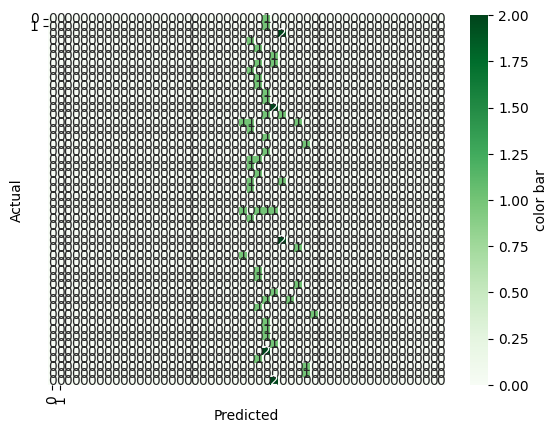

In [ ]:
sns.heatmap(cm2,cmap='Greens',annot=True,cbar_kws={'orientation':'vertical','label':'color bar'},
            xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()